In [25]:
# imports and settings
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
import explore_visualize as ev

pd.set_option('display.max_rows', 500)

# renamings for the paper
long_feature_mapping = {
 'lh_pitch_entropy': 'Pitch Entropy (L)',
 'rh_pitch_entropy': 'Pitch Entropy (R)',
 'rh_pitch_set_lz': 'Pitch Set LZ (R)',
 'lh_pitch_set_lz': 'Pitch Set LZ (L)',
 'rh_pitch_range': 'Pitch Range (R)',
 'lh_pitch_range': 'Pitch Range (L)',
 'lh_average_pitch': 'Average Pitch (L)',
 'rh_average_pitch': 'Average Pitch (R)',
 'rh_displacement_rate': 'Displacement Rate (R)',
 'lh_displacement_rate': 'Displacement Rate (L)',
 'lh_average_ioi_seconds': 'Average IOI (L)',
 'rh_average_ioi_seconds': 'Average IOI (R)'
}
short_feature_mapping = {
 'lh_pitch_entropy': 'P. Entropy (L)',
 'rh_pitch_entropy': 'P. Entropy (R)',
 'rh_pitch_set_lz': 'P. Set LZ (R)',
 'lh_pitch_set_lz': 'P. Set LZ (L)',
 'rh_pitch_range': 'P. Range (R)',
 'lh_pitch_range': 'P. Range (L)',
 'lh_average_pitch': 'Avg P. (L)',
 'rh_average_pitch': 'Avg P. (R)',
 'rh_displacement_rate': 'Disp. Rate (R)',
 'lh_displacement_rate': 'Disp. Rate (L)',
 'lh_average_ioi_seconds': 'Avg IOI (L)',
 'rh_average_ioi_seconds': 'Avg IOI (R)'
}



## Reproducing erroneous results from the draft

In [26]:
df = pd.read_json('../../cipi_extracted_features/basic-CIPI.json')
df = df.rename(columns=long_feature_mapping) 
columns = list(long_feature_mapping.values())
df[columns]

,Pitch Entropy (L),Pitch Entropy (R),Pitch Set LZ (R),Pitch Set LZ (L),Pitch Range (R),Pitch Range (L),Average Pitch (L),Average Pitch (R),Displacement Rate (R),Displacement Rate (L),Average IOI (L),Average IOI (R)
0,7.6847,8.0131,84,79,45,57,50,72,258,313,0.3148,0.2429
1,10.7817,11.4006,531,398,44,57,50,71,3737,2476,0.3098,0.2018
2,10.4719,11.0053,355,263,43,46,55,73,1689,2016,0.5274,0.3425
3,10.2595,11.1064,434,247,56,48,57,75,2163,907,0.4836,0.2517
4,10.8755,10.8313,428,476,60,45,50,69,1785,1170,0.3851,0.4229
...,...,...,...,...,...,...,...,...,...,...,...,...
647,12.7956,12.9844,1430,1276,56,57,51,73,7141,9757,0.2268,0.2337
648,8.5459,8.1008,50,34,21,20,58,71,240,180,0.2734,0.1496
649,8.7467,9.2903,233,163,27,33,55,69,723,526,0.4477,0.3123
650,9.9534,9.4942,151,123,51,38,51,73,607,1037,0.2674,0.5275


In [27]:
dc = ev.decisive_columns(df, columns, exclude_nans=True, n_neighbors=3)

dc['abs_tau_c'] = np.abs(dc.tau_c)
dc = dc.sort_values(by=["abs_tau_c"], ascending=[False])
dc = dc.reset_index(drop=True)
pd.set_option("display.precision", 4)

dc[["feature", "tau_c"]]

,feature,tau_c
0,Pitch Set LZ (L),0.5882
1,Pitch Entropy (L),0.5874
2,Displacement Rate (L),0.5872
3,Pitch Entropy (R),0.5840
4,Pitch Set LZ (R),0.5776
5,Pitch Range (L),0.5678
6,Displacement Rate (R),0.5648
7,Pitch Range (R),0.5530
8,Average IOI (L),-0.2210
9,Average IOI (R),-0.2172


In [28]:
dc[["feature", "tau_c"]].to_csv("draft_tau_c.csv", index=False, float_format="%.3f") 

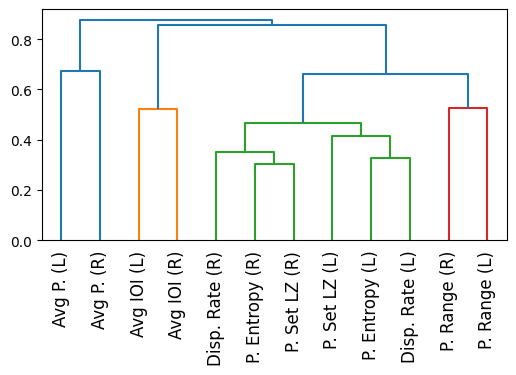

array([[ 1.        ,  2.        ,  0.3018029 ,  2.        ],
       [ 0.        ,  9.        ,  0.32815095,  2.        ],
       [ 8.        , 12.        ,  0.35053038,  3.        ],
       [ 3.        , 13.        ,  0.41533891,  3.        ],
       [14.        , 15.        ,  0.4665958 ,  6.        ],
       [10.        , 11.        ,  0.52180822,  2.        ],
       [ 4.        ,  5.        ,  0.52592295,  2.        ],
       [16.        , 18.        ,  0.66356686,  8.        ],
       [ 6.        ,  7.        ,  0.67399688,  2.        ],
       [17.        , 19.        ,  0.85778066, 10.        ],
       [20.        , 21.        ,  0.87610766, 12.        ]])

In [29]:
df = pd.read_json('../../cipi_extracted_features/basic-CIPI.json')
df = df.rename(columns=short_feature_mapping) 
columns = list(short_feature_mapping.values())
plt.rcParams['figure.figsize'] = [6, 3]
ev.correlation_dendrogram(df, columns, metric="tau-c", method="average",
                           grade_aggregation_method="mean", filename='draft_dendro.pdf')
#ev.correlation_dendrogram(df, columns)

## Final Stuff

In [30]:
df = pd.read_json('../../cipi_extracted_features/current_difficulties.json')
df = df.rename(columns=long_feature_mapping) 
columns = list(long_feature_mapping.values())
df[columns]

,Pitch Entropy (L),Pitch Entropy (R),Pitch Set LZ (R),Pitch Set LZ (L),Pitch Range (R),Pitch Range (L),Average Pitch (L),Average Pitch (R),Displacement Rate (R),Displacement Rate (L),Average IOI (L),Average IOI (R)
0,4.6167,4.1602,84,79,45,57,50,72,0.5375,0.8459,0.3148,0.2429
1,4.5423,4.2545,531,398,44,57,50,71,0.7954,0.8445,0.3098,0.2018
2,4.6211,4.3617,355,263,43,46,55,73,0.4187,0.8742,0.3023,0.1964
3,4.3452,4.1395,434,247,56,48,57,75,0.5580,0.4508,0.4836,0.2517
4,4.7404,4.9439,428,476,60,45,50,69,0.8881,0.5114,0.3851,0.4229
...,...,...,...,...,...,...,...,...,...,...,...,...
655,5.1512,5.2228,1430,1276,56,57,51,73,0.7162,0.9583,0.2185,0.2251
656,3.5416,3.8076,50,34,21,20,58,71,0.4598,0.7143,0.2734,0.1496
657,4.2899,4.2475,233,163,27,33,55,69,0.5775,0.6102,0.4477,0.3123
658,4.2679,4.7759,151,123,51,38,51,73,0.6082,0.5201,0.2674,0.5275


In [31]:
dc = ev.decisive_columns(df, columns, exclude_nans=True, n_neighbors=3)

dc['abs_tau_c'] = np.abs(dc.tau_c)
dc = dc.sort_values(by=["abs_tau_c"], ascending=[False])
dc = dc.reset_index(drop=True)
pd.set_option("display.precision", 3)

dc[["feature", "tau_c"]]

,feature,tau_c
0,Pitch Entropy (R),0.583
1,Pitch Set LZ (L),0.583
2,Pitch Entropy (L),0.582
3,Pitch Set LZ (R),0.573
4,Pitch Range (L),0.567
5,Pitch Range (R),0.554
6,Displacement Rate (R),0.332
7,Displacement Rate (L),0.273
8,Average IOI (R),-0.209
9,Average IOI (L),-0.208


In [32]:
dc[["feature", "tau_c"]].to_csv("final_tau_c.csv", index=False, float_format="%.3f") 

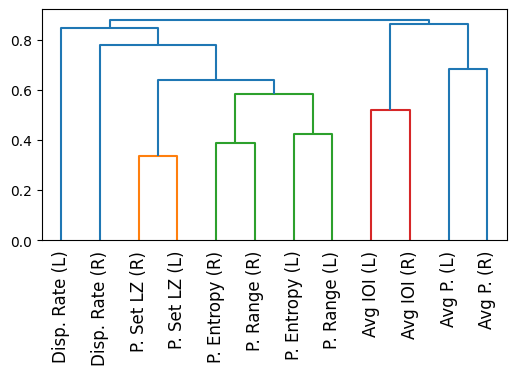

array([[ 2.        ,  3.        ,  0.33761305,  2.        ],
       [ 1.        ,  4.        ,  0.389145  ,  2.        ],
       [ 0.        ,  5.        ,  0.42550843,  2.        ],
       [10.        , 11.        ,  0.52131148,  2.        ],
       [13.        , 14.        ,  0.58310105,  4.        ],
       [12.        , 16.        ,  0.63859406,  6.        ],
       [ 6.        ,  7.        ,  0.6844036 ,  2.        ],
       [ 8.        , 17.        ,  0.78068593,  7.        ],
       [ 9.        , 19.        ,  0.84944862,  8.        ],
       [15.        , 18.        ,  0.86303912,  4.        ],
       [20.        , 21.        ,  0.87917669, 12.        ]])

In [33]:
df = pd.read_json('../../cipi_extracted_features/current_difficulties.json')
df = df.rename(columns=short_feature_mapping) 
columns = list(short_feature_mapping.values())
plt.rcParams['figure.figsize'] = [6, 3]
ev.correlation_dendrogram(df, columns, metric="tau-c", method="average",
                           grade_aggregation_method="mean", filename='final_dendro.pdf')

In [23]:
#ev.correlation_dendrogram(df, columns, metric="correlation", method="average",
#                           grade_aggregation_method="mean")